In [1]:
from __future__ import print_function
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline


### Fonction to display one image

In [ ]:
im_shape = [128, 2111]

def plot_im(im):
    plt.figure(figsize=(20, 10))
    plt.imshow(im.reshape(im_shape), aspect='auto')
    plt.grid(False)
    plt.gray()
    plt.show()

### Load files into an array

In [11]:
files = [f for f in glob('*/*.txt') if 'readme' not in f]
print(files)
print(len(files))

['hand/main15.txt', 'hand/main52.txt', 'hand/main34.txt', 'hand/main61.txt', 'hand/main20.txt', 'hand/main65.txt', 'hand/main70.txt', 'hand/main56.txt', 'hand/main36.txt', 'hand/main25.txt', 'hand/main28.txt', 'hand/main50.txt', 'hand/main16.txt', 'hand/main48.txt', 'hand/main33.txt', 'hand/main13.txt', 'hand/main67.txt', 'hand/main58.txt', 'hand/main27.txt', 'hand/main68.txt', 'hand/main14.txt', 'hand/main41.txt', 'hand/main46.txt', 'hand/main40.txt', 'hand/main19.txt', 'hand/main53.txt', 'hand/main63.txt', 'hand/main47.txt', 'hand/main51.txt', 'hand/main24.txt', 'hand/main17.txt', 'hand/main43.txt', 'hand/main35.txt', 'hand/main69.txt', 'hand/main59.txt', 'hand/main23.txt', 'hand/main26.txt', 'hand/main66.txt', 'hand/main21.txt', 'hand/main32.txt', 'hand/main44.txt', 'hand/main62.txt', 'hand/main54.txt', 'hand/main42.txt', 'hand/main49.txt', 'hand/main31.txt', 'hand/main57.txt', 'hand/main38.txt', 'hand/main39.txt', 'hand/main30.txt', 'hand/main37.txt', 'hand/main29.txt', 'hand/main6

In [13]:
data = np.array([np.loadtxt(f, dtype='int') for f in files])
data_ = data.astype('float32') / data.max()
print(data.shape)

(155, 128, 2111)


### Store corresponding labels in another array
- "h" for hand
- "g" for gelpad
- "s" for sponge

In [20]:
labels = [f[0] for f in files]
print(labels)

['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g']


### Select one image and display it

Here : 25th instance of sponge

kelu124: I'm using np.sqrt to get a "compressed" image. Usually, a log compression takes place, sqrt can give a first approximation

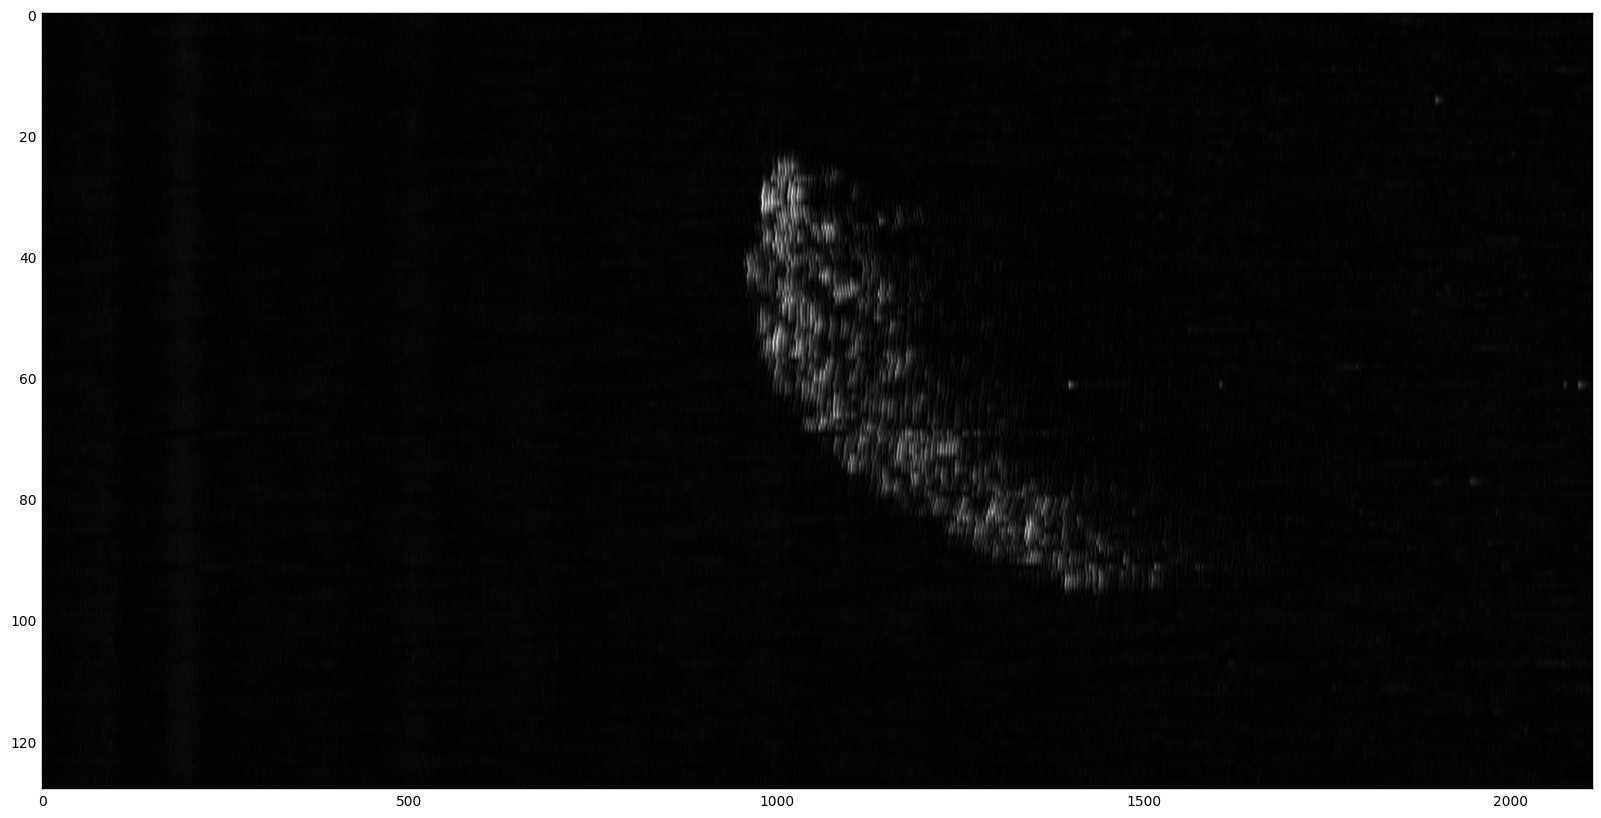

In [50]:
idx_list = np.array([l=='s' for l in labels])
#sample = np.sqrt(data_[idx_list][22])
sample = data_[idx_list][22]
plot_im(sample)

### Display fft along horizontal axis

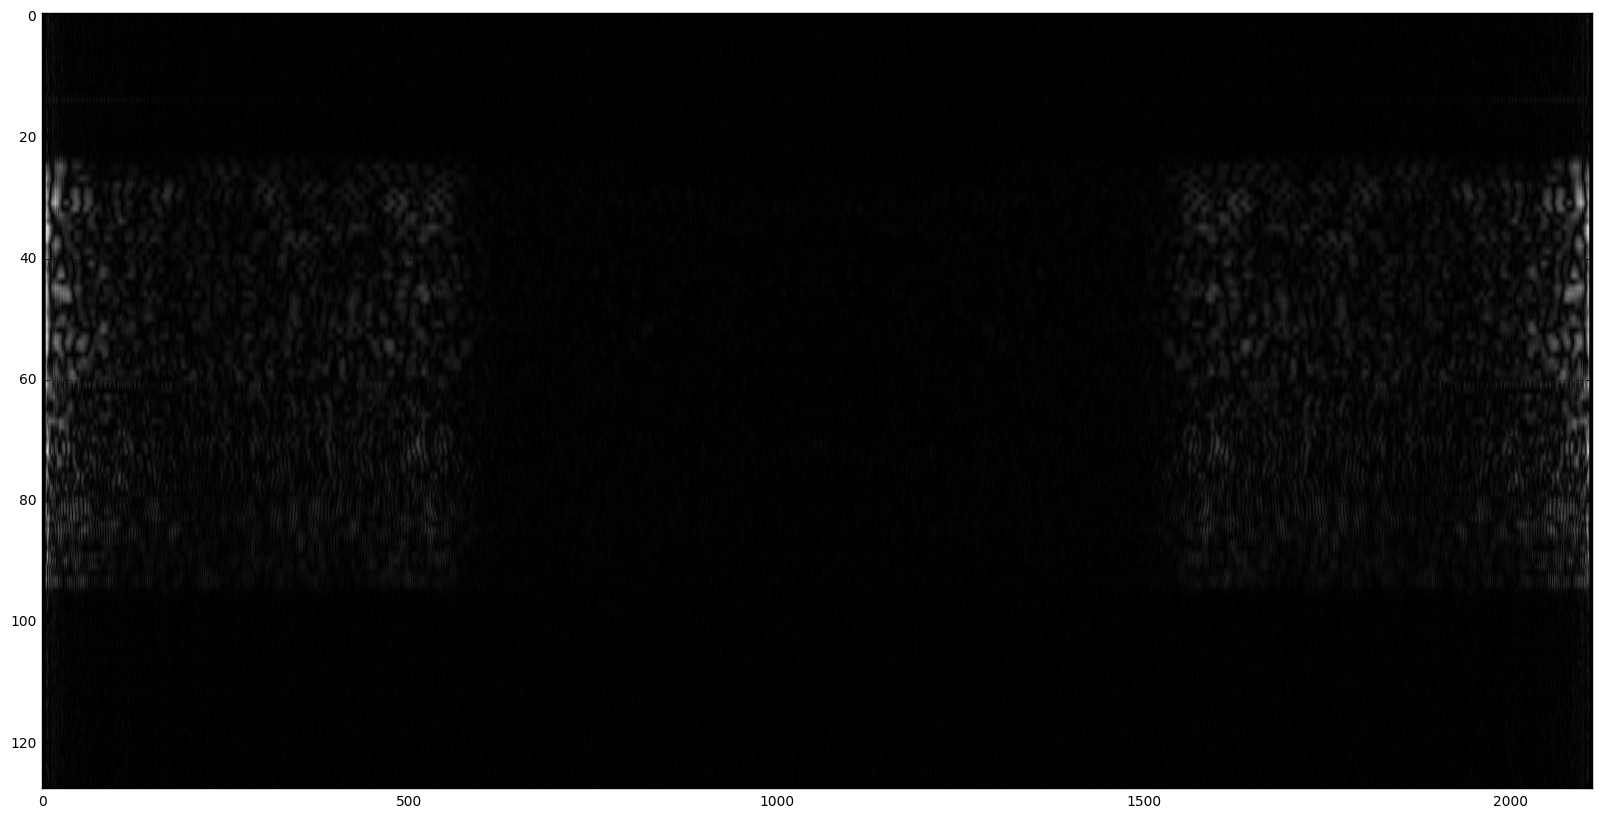

In [83]:
fourier_data = np.fft.fft(sample)
fourier_data_todisplay = np.fft.fft(sample)
for k in range (im_shape[0]):
    for i in range(5):
        fourier_data_todisplay[k][i]=0
        fourier_data_todisplay[k][-1-i]=0
plt.figure(figsize=(20, 10))
plt.imshow(np.abs(np.real(fourier_data_todisplay)).reshape(im_shape), aspect='auto')
#plt.xlim(0, 100)
plt.grid(True)
plt.gray()
plt.show()

## We see a strange pattern around line 70, let's explore it.

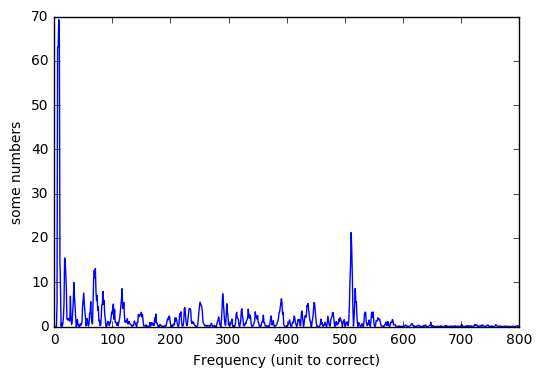

In [93]:
SelectedLine = np.square(np.abs(np.real(fourier_data_todisplay[70])))
plt.plot(SelectedLine[0:800])
plt.ylabel('some numbers')
plt.xlabel('Frequency (unit to correct)')
plt.show()

## We rebuild the image (checking image integrity)

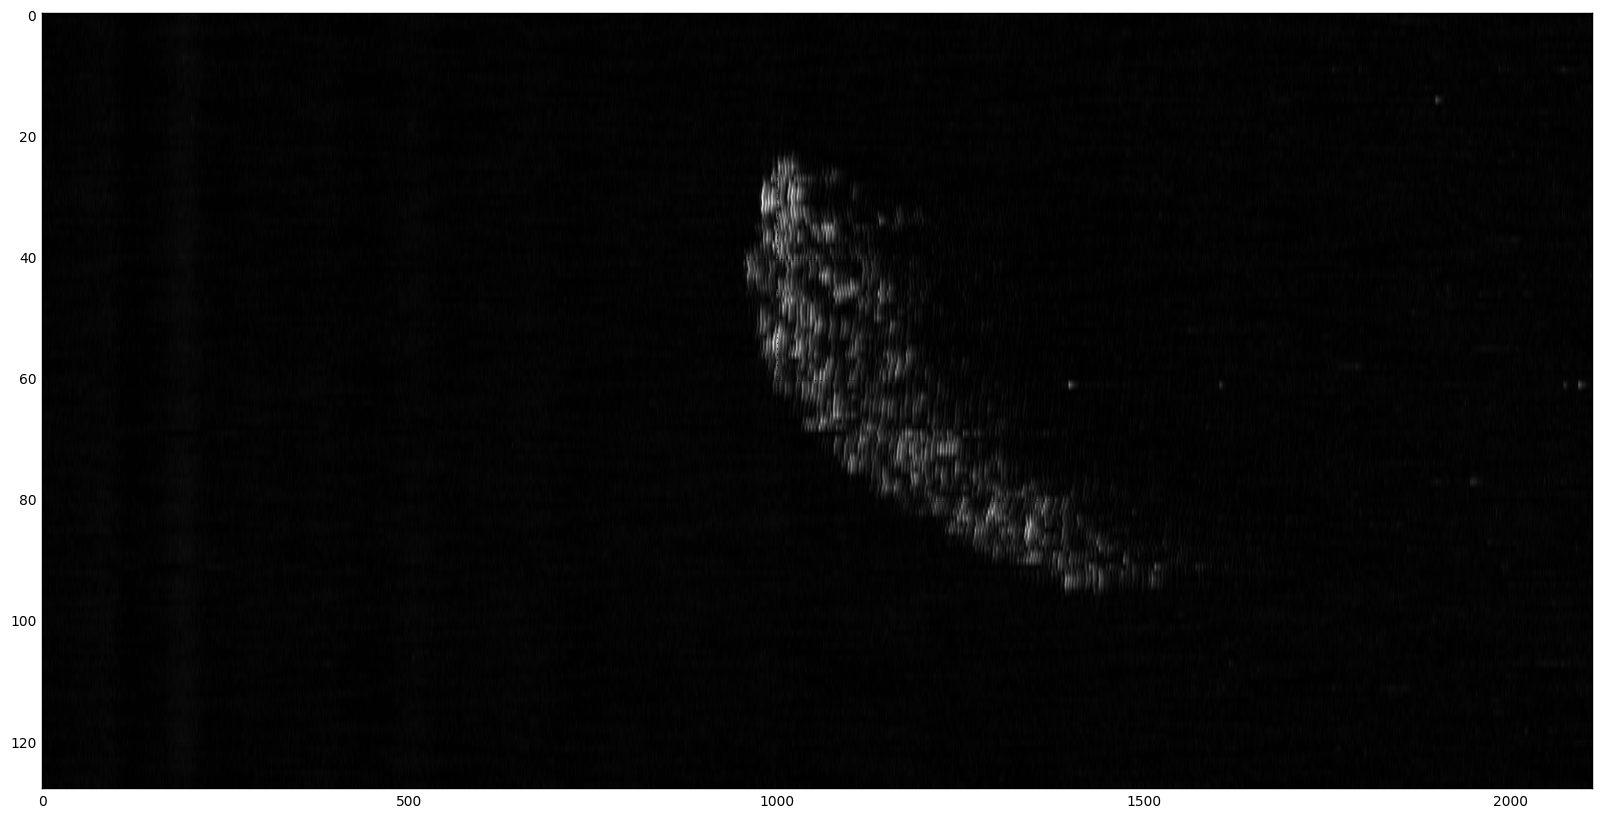

In [86]:
fourier_data_inverse = np.fft.ifft(fourier_data)
plt.figure(figsize=(20, 10))
plt.imshow(np.abs(fourier_data_inverse).reshape(im_shape), aspect='auto')
plt.grid(True)
plt.gray()
plt.show()